In [1]:
from IVClassification import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Beta

In [2]:
lg_dif = np.array([])
tslg_dif = np.array([])
s3lg_dif = np.array([])
gmm_dif = np.array([])
res_dif = np.array([])

para_range = np.linspace(0, 50, 100)

for beta in para_range:
    
    data = sim_scaled_data(n=10000, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_dif = np.append(lg_dif, np.abs(lg.coef_ - data.beta))
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_dif = np.append(tslg_dif, np.abs(tslg.coef_ - data.beta))
    
    # s3lg = three_stage_logit()
    # s3lg.fit(data.X, data.Y, data.Z)
    # s3lg_dif = np.append(s3lg_dif, np.abs(s3lg.coef_ - beta))
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_dif = np.append(gmm_dif, np.abs(gmm.coef_ - data.beta))
    
    res_model = residual_logit()
    res_model.fit(data.X, data.Y, data.Z)
    res_dif = np.append(res_dif, np.abs(res_model.beta - data.beta))
    


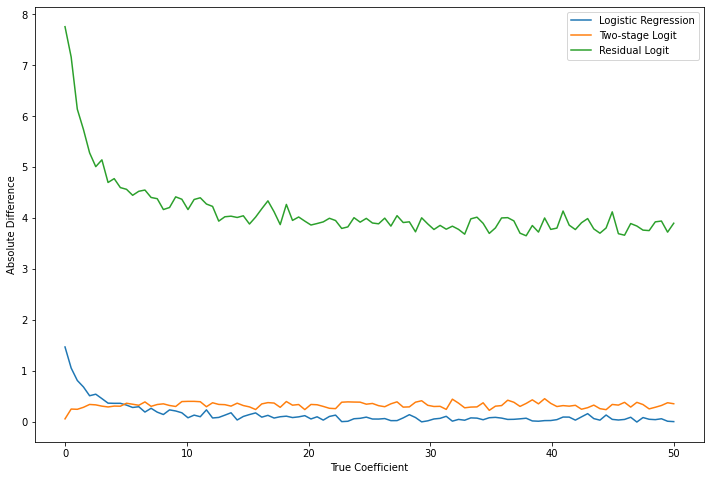

In [3]:
plt.figure(figsize=(12, 8))
plt.plot(para_range, lg_dif, label='Logistic Regression')
plt.plot(para_range, tslg_dif, label='Two-stage Logit')
#plt.plot(para_range, gmm_dif, label='GMM Logit')
plt.plot(para_range, res_dif, label='Residual Logit')
plt.xlabel('True Coefficient')
plt.ylabel('Absolute Difference')
plt.legend()

## Eta

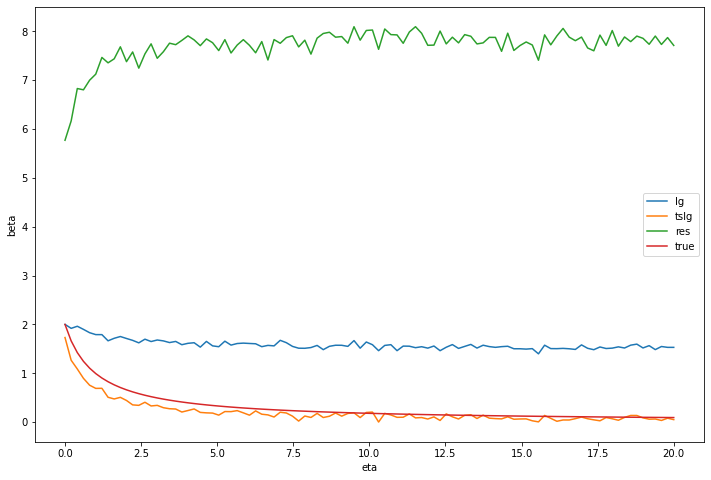

In [15]:
k = np.linspace(0, 20, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
gmm_coef = np.array([])
res_coef = np.array([])
true_beta = np.array([])
beta = 1

for eta in k:
    data = sim_scaled_data(n=10000, eta=eta, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    # s3lg = three_stage_logit()
    # s3lg.fit(data.X, data.Y, data.Z)
    # s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    # gmm = GMM_logit()
    # gmm.fit(data.X, data.Y, data.Z)
    # gmm_coef = np.append(gmm_coef, gmm.coef_)
    
    res_model = residual_logit()
    res_model.fit(data.X, data.Y, data.Z)
    res_coef = np.append(res_coef, res_model.beta)
    
    true_beta = np.append(true_beta, data.beta)
    
plt.figure(figsize=(12, 8))
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
# plt.plot(k, s3lg_coef, label='s3lg')
# plt.plot(k, gmm_coef, label='gmm')
plt.plot(k, res_coef, label='res')
plt.plot(k, true_beta, label='true')
plt.xlabel('eta')
plt.ylabel('beta')
plt.legend()

## Gamma

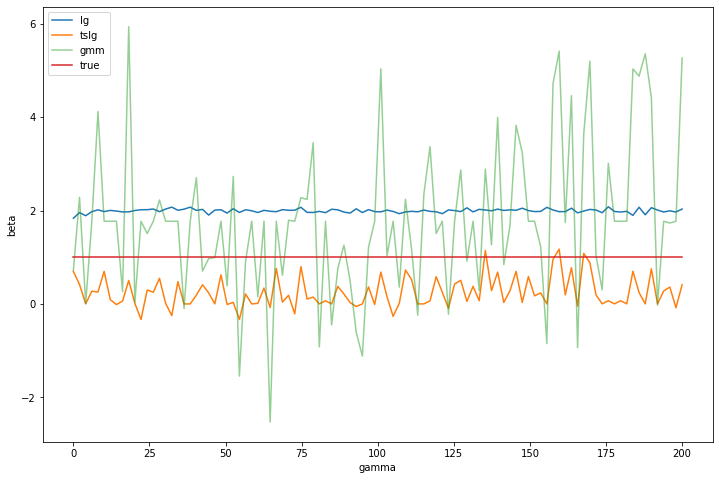

In [16]:
k = np.linspace(0, 200, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])      
gmm_coef = np.array([])
beta = 1

for gamma in np.power(10, k):
    data = sim_scaled_data(n=10000, gamma=gamma, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    # s3lg = three_stage_logit()
    # s3lg.fit(data.X, data.Y, data.Z)
    # s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_coef = np.append(gmm_coef, gmm.coef_)
    
    
# Detect outliers of gmm_coef and substitute them with the mean of other values
outliers = np.abs(gmm_coef - beta) > 5
gmm_coef[outliers] = np.mean(gmm_coef[~outliers])

plt.figure(figsize=(12, 8))
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
#plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label = 'gmm', alpha=0.5)
plt.plot(k, data.beta * np.ones(100), label='true')
#plt.xticks(k[::20], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::20]])
plt.xlabel('gamma')
plt.ylabel('beta')
plt.legend()